<a href="https://colab.research.google.com/github/nitinfaye/Classifier-prediction/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 2.
##Question 1
**Decision Tree Classifier**[10 Points]

Data: The zip file “hw2.q1.data.zip” contains 3 CSV files: 
•	“hw2.q1.train.csv” contains 10,000 rows and 26 columns. The first column ‘y’ is the output variable with 2 classes: 0, 1. The remaining 25 columns contain input features: x_1, …, x_25. 
•	“hw2.q1.test.csv” contains 5,000 rows and 41 columns. The first column ‘y’ is the output variable with 2 classes: 0, 1. The remaining 25 columns contain input features: x_1, …, x_25.
•	“hw2.q1.new.csv” contains 30 rows and 26 columns. The first column ‘ID’ is an identifier for 30 unlabeled samples. The remaining 25 columns contain input features: x_1, …, x_25.

**Task 1.** [4 points]
Use 5-fold cross-validationwith the 10,000 labeled exampled from “hw2.q1.train.csv” to determine the fewest number of rules using which a decision tree classifier can achieve mean cross-validation accuracy of at least 0.96.  Report the number of rules needed, the cross-validation accuracy obtained, and all the hyper-parameter values for the DecisionTreeClassifier.
Number of rules needed:……………….
Mean cross-validation accuracy: ………………………. (rounded to 4 decimal places)
Hyper-parameter values for selected DecisionTreeClassifier model

**Task 2.** [2 Points]
Train a DecisionTreeClassifier with the hyper-parameter values determined in Task 1 on all 10,000 training samples and use it to predict the output class ‘y’ for the 2,000 examples in “hw2.q1.test.csv”. Report the following:
•	Accuracy on 2,000 test examples: ……………………  (rounded to 4 decimal places)
•	Classification report for the 2,000 test examples:
•	Of the 952 test samples that belong to class y=1, how many are correctly predicted (according to your classification report)?

**Task 3.** [2 Points]
Use the model trained in Task 2 to predict the output class ‘y’ for the 30 examples in “hw2.q1.new.csv”. Specify the predicted classes in the table below:

**Task 4.** [2 Points]
Of the 25 input variables which ones are relevant for this classification task?
The following input variables are relevant for this classification task: …………………

Interpret your trained model and specify the rules that can be used to classify the output based on the inputs.


##Qustion 2
**Data:**

 The zip file “hw2.q2.data.zip” contains 3 CSV files: 
•	“hw2.q2.train.csv” contains 8,000 rows and 11 columns. The first column ‘y’ is the output variable with 4 classes: 0, 1, 2, 3. The remaining 10 columns contain input features: x1, …, x10. 
•	“hw2.q2.test.csv” contains 2,000 rows and 11 columns. The first column ‘y’ is the output variable with 4 classes: 0, 1, 2, 3. The remaining 10 columns contain input features: x1, …, x10.
•	“hw2.q1.new.csv” contains 30 rows and 10 columns. The first column ‘ID’ is an identifier for 30 unlabeled samples. The remaining 10 columns contain input features: x1, …, x10.

**Task**

1.
[6 points]

Use 4-fold cross-validation with the 8,000 labeled exampled from “hw2.q2.train.csv” to identify a classifier that achieves mean cross-validation accuracy of at least 0.96.  You should try several Scikit-Learn classifiers, including: GaussianNB, DecisionTreeClassifier, RandomForestClassifier, ExtraTreesClassifier, KNeighborsClassifier, LogisticRegression, SVC, and MLPClassifier. Try different hyper-parameter values for the better performing classifiers to obtain a good set of hyper-parameter values. Then select the best performing model. Report the following:
Selected model with hyper-parameter values:

**Task**
 2. [2 Points]
Train the classifier with the hyper-parameter values determined in Task 1 on all 8,000 training samples and use it to predict the output class ‘y’ for the 2,000 examples in “hw2.q2.test.csv”. Report the following:
•	Accuracy on 2,000 test examples: ……………………  (rounded to 4 decimal places)

•	Classification report for the 2,000 test examples:

•	Of the 500 test samples that belong to class y=0, how many are correctly predicted (according to your classification report)?

**Task**
 3. [2 Points]
Use the model trained in Task 2 to predict the output class ‘y’ for the 30 examples in “hw2.q2.new.csv”. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [2]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]


##Question 1 

In [3]:
q1_new = pd.read_csv("/content/hw2.q1.new.csv")
q1_train = pd.read_csv("/content/hw2.q1.train.csv")
q1_test = pd.read_csv("/content/hw2.q1.test.csv")

In [4]:
q1_new.head()

,ID,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25
0,ID_001,0.673,0.822,0.020,0.554,0.422,0.759,0.468,0.073,0.302,0.354,0.218,0.484,0.482,0.142,0.859,0.571,0.877,0.274,0.965,0.835,0.902,0.911,0.075,0.005,0.735
1,ID_002,0.911,0.460,0.566,0.883,0.145,0.857,0.734,0.391,0.853,0.253,0.920,0.177,0.622,0.902,0.322,0.941,0.040,0.947,0.916,0.857,0.893,0.578,0.371,0.205,0.799
2,ID_003,0.585,0.922,0.298,0.114,0.037,0.792,0.138,0.131,0.491,0.250,0.830,0.898,0.495,0.713,0.098,0.945,0.696,0.521,0.543,0.401,0.383,0.723,0.742,0.828,0.586
3,ID_004,0.900,0.366,0.082,0.498,0.585,0.494,0.491,0.730,0.396,0.664,0.647,0.512,0.035,0.597,0.475,0.917,0.041,0.820,0.811,0.624,0.936,0.906,0.951,0.199,0.723
4,ID_005,0.850,0.067,0.861,0.420,0.448,0.259,0.948,0.066,0.249,0.059,0.224,0.875,0.921,0.046,0.402,0.684,0.180,0.305,0.764,0.248,0.452,0.479,0.445,0.802,0.627


In [5]:
q1_train.head()

,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25
0,1.0,0.523,0.303,0.898,0.505,0.264,0.441,0.794,0.868,0.744,0.278,0.624,0.546,0.801,0.005,0.074,0.136,0.187,0.452,0.459,0.656,0.126,0.245,0.973,0.917,0.740
1,0.0,0.546,0.782,0.323,0.495,0.970,0.127,0.167,0.359,0.065,0.497,0.260,0.497,0.852,0.870,0.289,0.616,0.734,0.935,0.782,0.218,0.223,0.931,0.205,0.487,0.065
2,0.0,0.441,0.260,0.824,0.715,0.071,0.004,0.819,0.063,0.343,0.697,0.496,0.754,0.938,0.615,0.172,0.209,0.174,0.542,0.970,0.171,0.459,0.316,0.949,0.871,0.720
3,1.0,0.759,0.953,0.821,0.593,0.017,0.359,0.840,0.257,0.344,0.232,0.904,0.318,0.432,0.673,0.753,0.186,0.433,0.032,0.331,0.476,0.689,0.081,0.930,0.512,0.914
4,0.0,0.830,0.736,0.319,0.900,0.966,0.641,0.384,0.236,0.924,0.590,0.635,0.903,0.950,0.495,0.142,0.238,0.276,0.708,0.018,0.354,0.205,0.257,0.604,0.467,0.638


In [6]:
q1_test.head()

,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25
0,0.0,0.631,0.574,0.672,0.767,0.734,0.614,0.689,0.621,0.953,0.499,0.411,0.153,0.735,0.172,0.171,0.512,0.622,0.027,0.403,0.942,0.066,0.947,0.661,0.258,0.785
1,1.0,0.388,0.684,0.756,0.768,0.684,0.302,0.694,0.981,0.189,0.244,0.890,0.054,0.211,0.751,0.013,0.603,0.846,0.301,0.007,0.567,0.698,0.262,0.439,0.172,0.310
2,0.0,0.567,0.298,0.023,0.853,0.669,0.792,0.381,0.347,0.304,0.350,0.339,0.578,0.187,0.533,0.286,0.980,0.940,0.817,0.329,0.539,0.982,0.708,0.052,0.757,0.355
3,0.0,0.662,0.887,0.243,0.215,0.954,0.977,0.312,0.630,0.224,0.563,0.245,0.580,0.680,0.137,0.436,0.552,0.402,0.328,0.812,0.812,0.251,0.936,0.997,0.596,0.621
4,0.0,0.616,0.162,0.583,0.143,0.486,0.395,0.268,0.578,0.611,0.363,0.326,0.890,0.813,0.589,0.865,0.263,0.732,0.191,0.476,0.109,0.458,0.763,0.655,0.915,0.422


In [7]:
X_train = q1_train.iloc[:, 1:].values
y_train = q1_train.iloc[:, 0].values
print(X_train)
print(y_train)

[[0.523 0.303 0.898 ... 0.973 0.917 0.74 ]
 [0.546 0.782 0.323 ... 0.205 0.487 0.065]
 [0.441 0.26  0.824 ... 0.949 0.871 0.72 ]
 ...
 [0.748 0.582 0.506 ... 0.234 0.071 0.096]
 [0.464 0.659 0.55  ... 0.439 0.336 0.121]
 [0.149 0.636 0.268 ... 0.985 0.77  0.438]]
[1. 0. 0. ... 1. 0. 1.]


In [8]:
X_test = q1_test.iloc[:, 1:].values
y_test = q1_test.iloc[:, 0].values
print(X_test)
print(y_test)

[[0.631 0.574 0.672 ... 0.661 0.258 0.785]
 [0.388 0.684 0.756 ... 0.439 0.172 0.31 ]
 [0.567 0.298 0.023 ... 0.052 0.757 0.355]
 ...
 [0.601 0.355 0.412 ... 0.027 0.034 0.175]
 [0.299 0.635 0.448 ... 0.74  0.969 0.861]
 [0.441 0.804 0.728 ... 0.502 0.762 0.358]]
[0. 1. 0. ... 0. 0. 1.]


##Task 1

In [9]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 69.3000%
Log Loss: 2.585212888869401
SVC
****Results****
Accuracy: 79.4500%
Log Loss: 0.44285074197002294
NuSVC
****Results****
Accuracy: 86.7000%
Log Loss: 0.3327095252654602
DecisionTreeClassifier
****Results****
Accuracy: 92.9500%
Log Loss: 2.4349837358412034
RandomForestClassifier
****Results****
Accuracy: 97.0500%
Log Loss: 0.18093011433886855
AdaBoostClassifier
****Results****
Accuracy: 96.8500%
Log Loss: 0.6639635690171094
GradientBoostingClassifier
****Results****
Accuracy: 97.0500%
Log Loss: 0.13730068636156614
GaussianNB
****Results****
Accuracy: 84.4500%
Log Loss: 0.40748243172282755
LinearDiscriminantAnalysis
****Results****
Accuracy: 75.7500%
Log Loss: 0.4892049684150752
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 83.8000%
Log Loss: 0.3906024410297207


the model showsd best accuracy:-

**RandomForestClassifier**
****Results****
Accuracy: 97.0500%

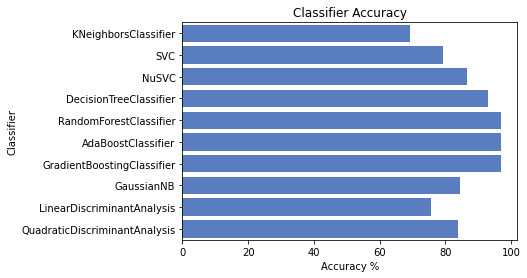

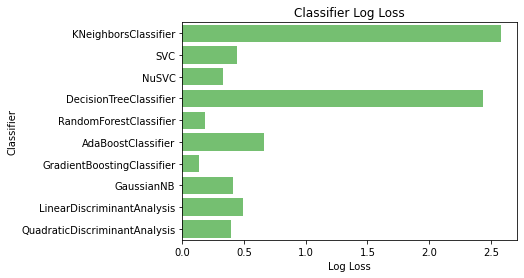

In [10]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

## Feature Scaling

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train)

[[ 0.07251069 -0.67514224  1.388941   ...  1.6525382   1.43977989
   0.82327842]
 [ 0.15223123  0.97609822 -0.60355068 ... -1.00880893 -0.04136103
  -1.48762041]
 [-0.21171039 -0.82337468  1.13251598 ...  1.56937111  1.28133226
   0.75480734]
 ...
 [ 0.85238559  0.286645    0.03058146 ... -0.90831535 -1.47427876
  -1.38149024]
 [-0.13198984  0.55208449  0.18305038 ... -0.19792972 -0.56148261
  -1.29590139]
 [-1.2238147   0.47279737 -0.79413684 ...  1.69412175  0.93343637
  -0.21063483]]


In [13]:
print(X_test)

[[ 0.44685064  0.25906687  0.60580514 ...  0.57136593 -0.83015469
   0.97733834]
 [-0.39541425  0.63826615  0.89688218 ... -0.19792972 -1.12638287
  -0.64884972]
 [ 0.22501956 -0.69237857 -1.64311155 ... -1.53899917  0.88865769
  -0.4947898 ]
 ...
 [ 0.34286732 -0.4958844  -0.29514762 ... -1.62563157 -1.60172577
  -1.11102949]
 [-0.7038981   0.46935011 -0.17040031 ...  0.8451243   1.61889461
   1.23752843]
 [-0.21171039  1.05193808  0.7998565  ...  0.02038391  0.90588026
  -0.48451914]]


## Training the Decision Tree Classification model on the Training set

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**Predicting a new result**

In [15]:
print(classifier.predict(sc.transform([[0.631,0.574,0.672,0.767,0.734,0.614,0.689,0.621,0.953,0.499,0.411,0.153,0.735,0.172,0.171,0.512,0.622,0.027,0.403,0.942,0.066,0.947,0.661,0.258,0.785]])))

[0.]


**Predicting the Test set results**

In [16]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [1. 0.]
 [0. 0.]
 [1. 1.]]


**Making the Confusion Matrix**

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[989  59]
 [ 67 885]]


0.937

##task 2

In [18]:
# make class predictions
y_pred = classifier.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print(f'ACCURACY:{accuracy}')
print('\n')
# generate classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

ACCURACY:0.937


              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      1048
         1.0       0.94      0.93      0.93       952

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [19]:
q1_test['predicted_y']= y_pred
q1_test.head()

,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,predicted_y
0,0.0,0.631,0.574,0.672,0.767,0.734,0.614,0.689,0.621,0.953,0.499,0.411,0.153,0.735,0.172,0.171,0.512,0.622,0.027,0.403,0.942,0.066,0.947,0.661,0.258,0.785,0.0
1,1.0,0.388,0.684,0.756,0.768,0.684,0.302,0.694,0.981,0.189,0.244,0.890,0.054,0.211,0.751,0.013,0.603,0.846,0.301,0.007,0.567,0.698,0.262,0.439,0.172,0.310,1.0
2,0.0,0.567,0.298,0.023,0.853,0.669,0.792,0.381,0.347,0.304,0.350,0.339,0.578,0.187,0.533,0.286,0.980,0.940,0.817,0.329,0.539,0.982,0.708,0.052,0.757,0.355,0.0
3,0.0,0.662,0.887,0.243,0.215,0.954,0.977,0.312,0.630,0.224,0.563,0.245,0.580,0.680,0.137,0.436,0.552,0.402,0.328,0.812,0.812,0.251,0.936,0.997,0.596,0.621,0.0
4,0.0,0.616,0.162,0.583,0.143,0.486,0.395,0.268,0.578,0.611,0.363,0.326,0.890,0.813,0.589,0.865,0.263,0.732,0.191,0.476,0.109,0.458,0.763,0.655,0.915,0.422,0.0


In [20]:
submission_dec = q1_test[['y', 'predicted_y']]
submission_dec

,y,predicted_y
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1995,0.0,0.0
1996,1.0,1.0
1997,0.0,1.0
1998,0.0,0.0


In [21]:
q1_new_pred=y_pred[:30]
q1_new_pred

array([0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.])

In [22]:
q1_new_data = q1_new[:30]

In [23]:
q1_new_data['predicted_y']= q1_new_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
q1_new_data.head()

,ID,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,predicted_y
0,ID_001,0.673,0.822,0.020,0.554,0.422,0.759,0.468,0.073,0.302,0.354,0.218,0.484,0.482,0.142,0.859,0.571,0.877,0.274,0.965,0.835,0.902,0.911,0.075,0.005,0.735,0.0
1,ID_002,0.911,0.460,0.566,0.883,0.145,0.857,0.734,0.391,0.853,0.253,0.920,0.177,0.622,0.902,0.322,0.941,0.040,0.947,0.916,0.857,0.893,0.578,0.371,0.205,0.799,1.0
2,ID_003,0.585,0.922,0.298,0.114,0.037,0.792,0.138,0.131,0.491,0.250,0.830,0.898,0.495,0.713,0.098,0.945,0.696,0.521,0.543,0.401,0.383,0.723,0.742,0.828,0.586,0.0
3,ID_004,0.900,0.366,0.082,0.498,0.585,0.494,0.491,0.730,0.396,0.664,0.647,0.512,0.035,0.597,0.475,0.917,0.041,0.820,0.811,0.624,0.936,0.906,0.951,0.199,0.723,0.0
4,ID_005,0.850,0.067,0.861,0.420,0.448,0.259,0.948,0.066,0.249,0.059,0.224,0.875,0.921,0.046,0.402,0.684,0.180,0.305,0.764,0.248,0.452,0.479,0.445,0.802,0.627,0.0


##task3

In [25]:
submission= q1_new_data[['ID', 'predicted_y']]
submission

,ID,predicted_y
0,ID_001,0.0
1,ID_002,1.0
2,ID_003,0.0
3,ID_004,0.0
4,ID_005,0.0
5,ID_006,0.0
6,ID_007,1.0
7,ID_008,1.0
8,ID_009,0.0
9,ID_010,1.0


##task 4
Of the 25 input variables which ones are relevant for this classification task?
The following input variables are relevant for this classification task: ……x[21],x[11],x[3],x[16],x[12]……………

Interpret your trained model and specify the rules that can be used to classify the output based on the inputs.

In [26]:
new_result= q1_new_data[['x_21','x_11','x_3','x_16','x_12']]
new_result.head()

,x_21,x_11,x_3,x_16,x_12
0,0.902,0.218,0.020,0.571,0.484
1,0.893,0.920,0.566,0.941,0.177
2,0.383,0.830,0.298,0.945,0.898
3,0.936,0.647,0.082,0.917,0.512
4,0.452,0.224,0.861,0.684,0.875


In [27]:
feature_21= new_result['x_21']
feature_11=new_result['x_11']
feature_3 =new_result['x_3']
feature_16 = new_result['x_16']
feature_12 =new_result['x_12'] 

In [28]:
def prediction(feature_21,feature_11,feature_3,feature_16,feature_12):

  if feature_21 <= 0.87:
    if feature_11 <= 1.01:
      if feature_3 <= 1.09:
        print('class: 1.0')

  if feature_21 <= 0.8:
    if feature_11 <= 1.01:
      if feature_3 > 1.09:
        print('class: 0.0')

#Rule 3 
  if feature_21 <= 0.87:
    if feature_11 > 1.0:
      print('class: 0.0')

#Rule 4. 
  if feature_21 >  0.87:
    if feature_16 <= 1.71:
      if feature_12 <= -1.72:
        print('class: 0.0')

#Rule 5.
  if feature_21 >  0.87:
    if feature_16 <= 1.71:
      if feature_12 > -1.72:
        print('class: 0.0')

#Rule 6. 
  if feature_21 >  0.87:
    if feature_16 > 1.71:
      print('class: 1.0')


In [29]:
prediction(0.902,	0.218,	0.020,	0.571,	0.484)

class: 0.0


In [30]:
prediction(0.452,	0.224,	0.861,	0.684,	0.875)

class: 1.0


##qustion 2 

In [31]:
q2_new = pd.read_csv("/content/hw2.q2.new.csv")
q2_train = pd.read_csv("/content/hw2.q2.train.csv")
q2_test = pd.read_csv("/content/hw2.q2.test.csv")

In [32]:
q2_new.head()

,ID,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,ID_001,0.531,3.611,0.593,-0.334,1.423,1.045,-1.324,2.593,-0.085,2.383
1,ID_002,-2.133,-3.412,1.057,0.459,2.413,-0.919,3.076,0.892,3.552,-1.467
2,ID_003,0.270,-0.918,0.900,-0.699,2.407,-0.564,3.259,-0.536,1.287,0.427
3,ID_004,-0.503,-1.124,3.121,-2.338,0.194,-0.722,0.971,0.682,1.288,0.352
4,ID_005,3.244,2.381,1.602,0.400,0.064,-0.859,-2.545,0.422,3.577,0.390


In [33]:
q2_train.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,2.0,-0.613,-1.465,-1.105,0.436,-1.658,-1.357,-2.375,-0.997,-0.653,1.186
1,1.0,-1.154,0.473,3.159,-4.770,0.402,-0.160,-1.925,-0.105,-2.304,0.032
2,2.0,0.147,-0.814,-0.792,-1.403,2.124,-2.263,-2.133,-2.461,-0.781,0.932
3,2.0,0.257,0.056,-4.556,3.006,3.555,-0.215,-3.230,-2.910,-6.938,3.004
4,2.0,0.414,-2.268,-2.573,0.374,1.498,-2.110,-3.180,-2.537,-3.261,0.654


In [34]:
X_train = q2_train.iloc[:, 1:].values
y_train = q2_train.iloc[:, 0].values

In [35]:
print(X_train)
print(y_train)


[[-0.613 -1.465 -1.105 ... -0.997 -0.653  1.186]
 [-1.154  0.473  3.159 ... -0.105 -2.304  0.032]
 [ 0.147 -0.814 -0.792 ... -2.461 -0.781  0.932]
 ...
 [-2.258 -1.725  0.399 ...  2.177  1.62  -4.489]
 [-2.433  2.656  0.504 ...  1.172 -1.406 -1.709]
 [-4.033 -0.061  1.171 ...  2.414 -0.66  -1.85 ]]
[2. 1. 2. ... 0. 1. 1.]


In [36]:
q2_test.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,3.0,3.232,1.764,0.415,0.298,3.483,-2.967,-2.776,-0.663,-1.972,3.462
1,0.0,0.511,2.965,1.070,-5.708,-1.587,3.128,-0.085,5.147,2.264,3.042
2,2.0,-3.026,-3.338,0.276,0.822,-0.464,-2.247,-3.819,0.463,2.213,3.246
3,0.0,0.502,-0.251,0.238,2.173,-1.484,2.063,-2.517,-0.330,3.394,2.273
4,0.0,-1.609,-2.429,-2.249,-2.522,2.858,5.679,0.190,2.790,2.770,-6.885


In [37]:
X_test = q2_test.iloc[:, 1:].values
y_test = q2_test.iloc[:, 0].values

In [38]:
print(X_test)
print(y_test)

[[ 3.232  1.764  0.415 ... -0.663 -1.972  3.462]
 [ 0.511  2.965  1.07  ...  5.147  2.264  3.042]
 [-3.026 -3.338  0.276 ...  0.463  2.213  3.246]
 ...
 [-7.994 -3.439 -0.295 ...  2.895 -2.137 -2.122]
 [-0.763  1.872  3.001 ...  0.201 -0.578  0.453]
 [-1.605  0.75  -0.78  ... -1.344  0.19   0.475]]
[3. 0. 2. ... 1. 3. 3.]


##Task 1

In [39]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 96.9500%
Log Loss: 0.6201403818546847
SVC
****Results****
Accuracy: 93.3000%
Log Loss: 0.21392782558463738
NuSVC
****Results****
Accuracy: 92.6500%
Log Loss: 0.23587518755980033
DecisionTreeClassifier
****Results****
Accuracy: 85.3500%
Log Loss: 5.059930741854416
RandomForestClassifier
****Results****
Accuracy: 94.7500%
Log Loss: 0.3179550830457563
AdaBoostClassifier
****Results****
Accuracy: 79.9000%
Log Loss: 1.320804721557101
GradientBoostingClassifier
****Results****
Accuracy: 93.2500%
Log Loss: 0.25257269096940016
GaussianNB
****Results****
Accuracy: 84.4000%
Log Loss: 0.4705159105341128
LinearDiscriminantAnalysis
****Results****
Accuracy: 86.0500%
Log Loss: 0.4033631596557784
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 94.3000%
Log Loss: 0.3056659595499301


KNeighborsClassifier
****Results****
Accuracy: 96.9500% is show better performance


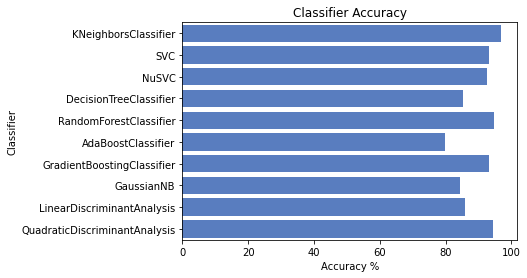

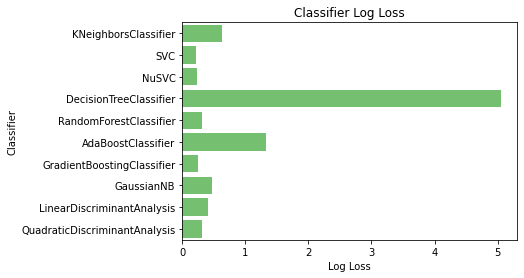

In [40]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

## Feature Scaling

In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
print(X_train)

[[ 6.98307294e-02 -6.42314530e-01 -6.47286692e-01 ... -4.40500751e-01
  -1.13020996e-01  4.76826018e-01]
 [-1.67032579e-01  2.19903758e-01  1.24048447e+00 ... -6.44667955e-02
  -8.46722651e-01  1.46059527e-03]
 [ 4.02577706e-01 -3.52683928e-01 -5.08714371e-01 ... -1.05766859e+00
  -1.69903983e-01  3.72196193e-01]
 ...
 [-6.50391346e-01 -7.57988810e-01  1.85688016e-02 ...  8.97539355e-01
   8.97096425e-01 -1.86086789e+00]
 [-7.27010716e-01  1.19112281e+00  6.50547236e-02 ...  4.73868811e-01
  -4.47652944e-01 -7.15706823e-01]
 [-1.42753067e+00 -1.76734172e-02  3.60351009e-01 ...  9.97449722e-01
  -1.16131784e-01 -7.73788733e-01]]


In [43]:
print(X_test)

[[ 1.75326774  0.79427105  0.02565237 ... -0.2996988  -0.6991824
   1.41437515]
 [ 0.561946    1.32859724  0.31563598 ...  2.14958066  1.18328895
   1.24136521]
 [-0.98664092 -1.47561425 -0.03588614 ...  0.17498084  1.16062464
   1.32539861]
 ...
 [-3.16175537 -1.52054926 -0.28868101 ...  1.20022139 -0.77250813
  -0.88583327]
 [ 0.00415698  0.84232036  1.17053422 ...  0.0645314  -0.07969112
   0.17488247]
 [-0.36449164  0.34314136 -0.50340169 ... -0.58678302  0.2616068
   0.1839449 ]]


## Training the K-NN model on the Training set

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

 Predicting a new result

In [45]:
print(classifier.predict(sc.transform([[3.232,1.764,0.415,0.298,3.483,-2.967,-2.776,-0.663,-1.972,3.462]])))

[3.]


 Predicting the Test set results

In [46]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3. 3.]
 [0. 0.]
 [2. 2.]
 ...
 [1. 1.]
 [3. 3.]
 [3. 3.]]


##Task 2

Making the Confusion Matrix

In [47]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[489   7   1   3]
 [  9 481   3   5]
 [  4   7 481   1]
 [  5   9   4 491]]


0.971

In [48]:
# make class predictions
y_pred = classifier.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print(f'ACCURACY:{accuracy}')
print('\n')
# generate classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

ACCURACY:0.971


              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       500
         1.0       0.95      0.97      0.96       498
         2.0       0.98      0.98      0.98       493
         3.0       0.98      0.96      0.97       509

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [49]:
new_pred=y_pred[:30]
new_pred

array([3., 0., 2., 0., 0., 0., 0., 1., 0., 3., 2., 2., 2., 1., 3., 0., 3.,
       0., 2., 2., 1., 0., 2., 1., 2., 3., 3., 0., 3., 0.])

In [50]:
q2_new_data = q2_new[:30]
q2_new_data['predicted_y']= new_pred
q2_new_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,predicted_y
0,ID_001,0.531,3.611,0.593,-0.334,1.423,1.045,-1.324,2.593,-0.085,2.383,3.0
1,ID_002,-2.133,-3.412,1.057,0.459,2.413,-0.919,3.076,0.892,3.552,-1.467,0.0
2,ID_003,0.270,-0.918,0.900,-0.699,2.407,-0.564,3.259,-0.536,1.287,0.427,2.0
3,ID_004,-0.503,-1.124,3.121,-2.338,0.194,-0.722,0.971,0.682,1.288,0.352,0.0
4,ID_005,3.244,2.381,1.602,0.400,0.064,-0.859,-2.545,0.422,3.577,0.390,0.0


##Task 3

In [51]:
submission = q2_new_data[['ID', 'predicted_y']]
submission

,ID,predicted_y
0,ID_001,3.0
1,ID_002,0.0
2,ID_003,2.0
3,ID_004,0.0
4,ID_005,0.0
5,ID_006,0.0
6,ID_007,0.0
7,ID_008,1.0
8,ID_009,0.0
9,ID_010,3.0
